# Week 14 Programming Assignment

As you're working on identifying data for your final project, it's helpful to spend some time exploring your various data files.  For this week's assignment, I'd like you to take a few of the ideas from the the lectures, review assignment, and tonight's lecture to start exploring the data you plan to use for the final project.

For the following activities, you can use just one of the data files that you've identified, or you can do the activities using different data files.  That's up to you.  Please describe what you're doing in a Markdown cell or in the comments of your code.  When you've completed the assignment, submit it as normal.

### 1. Basic Statistics

Use Python to read in your data file and show many rows and columns your data has.

In [21]:
import pandas as pd
data = pd.read_csv('/content/Behavioral_Risk_Factor_Surveillance_System__BRFSS__-__National_Cardiovascular_Disease_Surveillance_Data.csv')
data.head()

<ipython-input-21-a1d6f1faaad1>:2: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/Behavioral_Risk_Factor_Surveillance_System__BRFSS__-__National_Cardiovascular_Disease_Surveillance_Data.csv')


,RowId,YearStart,LocationAbbr,LocationDesc,DataSource,PriorityArea1,PriorityArea2,PriorityArea3,PriorityArea4,Class,...,Break_Out_Category,Break_Out,ClassId,TopicId,QuestionId,Data_Value_TypeID,BreakOutCategoryId,BreakOutId,LocationId,Geolocation
0,BRFSS~2011~01~BR001~OVR01~Age-Standardized,2011,AL,Alabama,BRFSS,NaN,NaN,NaN,NaN,Cardiovascular Diseases,...,Overall,Overall,C1,T1,BR001,AgeStdz,BOC01,OVR01,1,POINT (-86.63186076199969 32.84057112200048)
1,BRFSS~2011~01~BR001~OVR01~Crude,2011,AL,Alabama,BRFSS,NaN,NaN,NaN,NaN,Cardiovascular Diseases,...,Overall,Overall,C1,T1,BR001,Crude,BOC01,OVR01,1,POINT (-86.63186076199969 32.84057112200048)
2,BRFSS~2011~01~BR001~GEN01~Crude,2011,AL,Alabama,BRFSS,NaN,NaN,NaN,NaN,Cardiovascular Diseases,...,Gender,Male,C1,T1,BR001,Crude,BOC02,GEN01,1,POINT (-86.63186076199969 32.84057112200048)
3,BRFSS~2011~01~BR001~GEN01~Age-Standardized,2011,AL,Alabama,BRFSS,NaN,NaN,NaN,NaN,Cardiovascular Diseases,...,Gender,Male,C1,T1,BR001,AgeStdz,BOC02,GEN01,1,POINT (-86.63186076199969 32.84057112200048)
4,BRFSS~2011~01~BR001~GEN02~Age-Standardized,2011,AL,Alabama,BRFSS,NaN,NaN,NaN,NaN,Cardiovascular Diseases,...,Gender,Female,C1,T1,BR001,AgeStdz,BOC02,GEN02,1,POINT (-86.63186076199969 32.84057112200048)


In [22]:
data.shape

(160160, 30)

In [23]:
data.columns

Index(['RowId', 'YearStart', 'LocationAbbr', 'LocationDesc', 'DataSource',
       'PriorityArea1', 'PriorityArea2', 'PriorityArea3', 'PriorityArea4',
       'Class', 'Topic', 'Question', 'Data_Value_Type', 'Data_Value_Unit',
       'Data_Value', 'Data_Value_Alt', 'Data_Value_Footnote_Symbol',
       'Data_Value_Footnote', 'Low_Confidence_Limit', 'High_Confidence_Limit',
       'Break_Out_Category', 'Break_Out', 'ClassId', 'TopicId', 'QuestionId',
       'Data_Value_TypeID', 'BreakOutCategoryId', 'BreakOutId', 'LocationId',
       'Geolocation'],
      dtype='object')

### 2. Data Diversity

Use Python to identify how many unique values each column in your data has.  Use Python to identify which column has the greatest number of distinct values (aka the most diversity)?  If your data has a unique identifier (e.g. a person or visit or record ID) then find the column with the next most number of unique values.

In [24]:
unique_values = data.nunique()
unique_values

,0
RowId,160160
YearStart,10
LocationAbbr,52
LocationDesc,52
DataSource,1
PriorityArea1,1
PriorityArea2,0
PriorityArea3,1
PriorityArea4,0
Class,2


In [25]:
# Identify the column with the greatest number of unique values
most_diverse_column = unique_values.idxmax()
most_diverse_count = unique_values.max()
most_diverse_column
most_diverse_count


160160

### 3. Data Redundancy

Use Python to identify any columns in your data where the value for every row is the same.  For example, if you had a gender column and all the rows said 'M', then you would want to write the code that helped you determine that.

In [26]:
# Identify columns where all values are the same
constant_columns = [col for col in data.columns if data[col].nunique() == 1]

# Output the results
if constant_columns:
    print("Columns where every row has the same value:")
    for col in constant_columns:
        print(f" - {col}: {data[col].iloc[0]} (all rows)")
else:
    print("No columns have the same value for every row.")

Columns where every row has the same value:
 - DataSource: BRFSS (all rows)
 - PriorityArea1: nan (all rows)
 - PriorityArea3: nan (all rows)
 - Data_Value_Unit: Percent (%) (all rows)


### 4. Range of Values

Your data almost certainly has some numeric columns that can be summed or averaged.  Create a histogram that shows the distribution of values for this column.

In [27]:
# Identify numeric columns
numeric_columns = data.select_dtypes(include='number').columns

# Calculate the sum and average for each numeric column
sum_values = data[numeric_columns].sum()
avg_values = data[numeric_columns].mean()

# Display the results
print("Sum of numeric columns:")
print(sum_values)

print("\nAverage of numeric columns:")
print(avg_values)

Sum of numeric columns:
YearStart                322802480.0
PriorityArea2                    0.0
PriorityArea4                    0.0
Data_Value                 2426972.1
Data_Value_Alt             2322626.1
Low_Confidence_Limit       2151546.0
High_Confidence_Limit      2607791.1
LocationId                 4727800.0
dtype: float64

Average of numeric columns:
YearStart                2015.500000
PriorityArea2                    NaN
PriorityArea4                    NaN
Data_Value                 31.020772
Data_Value_Alt             14.501911
Low_Confidence_Limit       28.193702
High_Confidence_Limit      34.172305
LocationId                 29.519231
dtype: float64


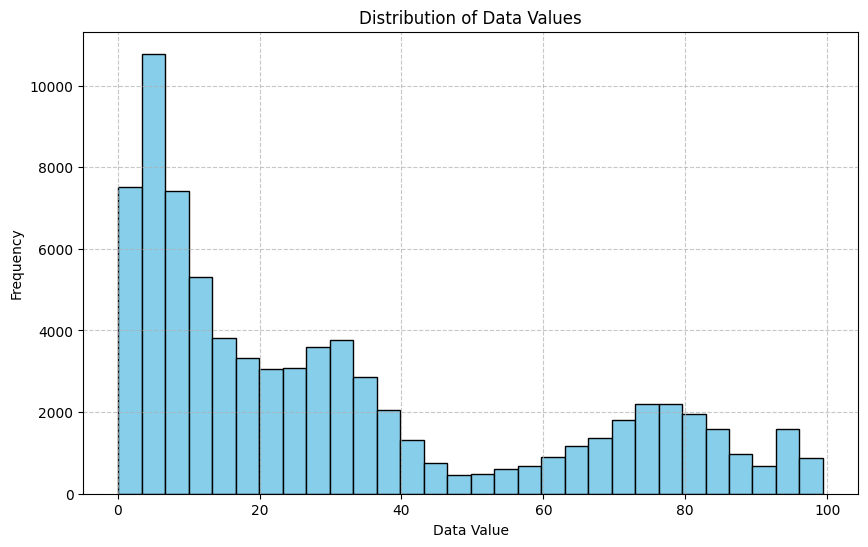

In [28]:
# Ensure 'Data_Value' is numeric
data['Data_Value'] = pd.to_numeric(data['Data_Value'], errors='coerce')

# Plot a histogram of 'Data_Value'
plt.figure(figsize=(10, 6))
plt.hist(data['Data_Value'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Data Values')
plt.xlabel('Data Value')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

The histogram shows the distribution of `Data Values`, with a large concentration of values near 0, indicating many low or zero values in the dataset. As the values increase, the frequency decreases, suggesting that higher values are less common. The data appears to have a right-skewed distribution, with a long tail on the higher end.

I want to create another visualisations

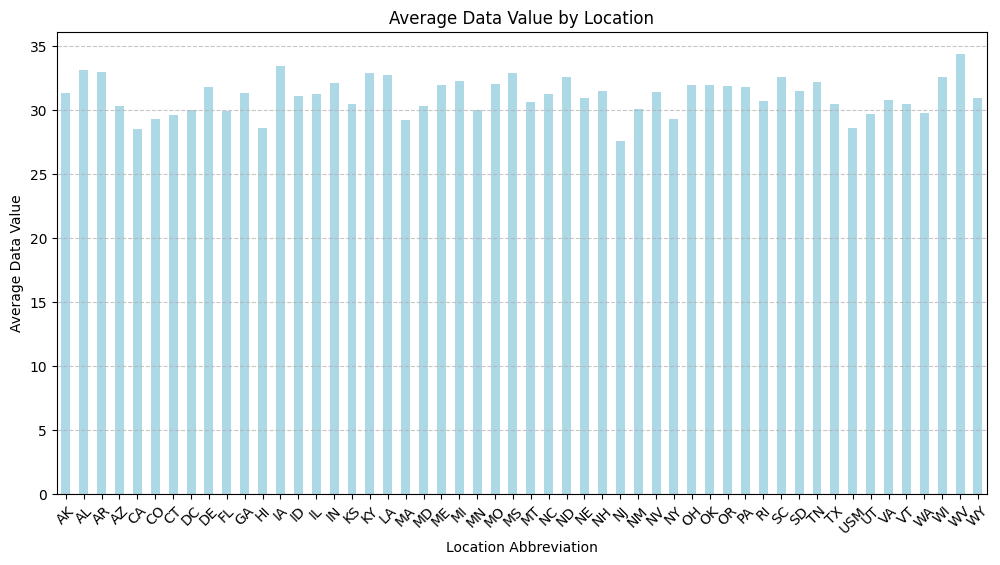

In [29]:
# Group by 'LocationAbbr' and calculate average 'Data_Value'
location_avg_values = data.groupby('LocationAbbr')['Data_Value'].mean()

# Plot a bar chart for location-based data value distribution
plt.figure(figsize=(12, 6))
location_avg_values.plot(kind='bar', color='lightblue')
plt.title('Average Data Value by Location')
plt.xlabel('Location Abbreviation')
plt.ylabel('Average Data Value')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



---



## Submitting Your Work

Submit your work as usual.